# Dataset Simulation Test 

### Based off of Literature review and research into distributions for pet dogs in Southern US

#### Note:
- Dog-specific features use national distributions
- Environ features use Southeast US distributions

In [162]:
import numpy as np
import pandas as pd
import ast 
from matplotlib import pyplot as plt

In [163]:
import os
os.getcwd()
# change directory to where you cloned Repo on your local machine
# you can then access our files there rather than needing to download each onto local machine
os.chdir("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp")

In [164]:
dogs_dataset = pd.read_csv("dogs_dataset.csv")
dogs_dataset.head()

# use for sampling breed.
# for each breed. this dataset is simulated but menat to represent real-world
# distributions

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [165]:
# get distribution for breeds (popularity in US = proportions)
breed_probs = dogs_dataset["Breed"].value_counts(normalize=True)

# View as percentages
breed_percentages = (breed_probs * 100).round(2)
# Print
print(breed_percentages.head())  # top 5 breeds

breed_categories = breed_probs.index.tolist()
breed_probabilities = breed_probs.values.tolist()

Breed
Rottweiler              3.93
French Bulldog          2.33
Pekingese               2.27
Pembroke Welsh Corgi    2.23
Doberman Pinscher       2.20
Name: proportion, dtype: float64


In [166]:
# summarize each breed's age, wt, gender, color distributions.
breed_params_df = dogs_dataset.groupby('Breed').agg({
    'Age (Years)': ['mean', 'std'],
    'Weight (kg)': ['mean', 'std'],
    'Gender': lambda x: x.value_counts(normalize=True).to_dict(),
    'Color': lambda x: x.value_counts(normalize=True).to_dict()
}).reset_index()

# need mu and sd to use normal distribution for each breed's age and wt to build sample population.
breed_params_df.columns = ['Breed', 'age_mu', 'age_sd', 'wt_mu', 'wt_sd', 'gender_probs', 'color_probs']
breed_params_df.head()

,Breed,age_mu,age_sd,wt_mu,wt_sd,gender_probs,color_probs
0,Airedale Terrier,8.218182,4.336285,31.818182,13.997475,"{'Male': 0.5454545454545454, 'Female': 0.45454...","{'Tricolor': 0.12727272727272726, 'Bicolor': 0..."
1,Akita,7.784314,3.874603,31.686275,14.360348,"{'Male': 0.5686274509803921, 'Female': 0.43137...","{'Merle': 0.11764705882352941, 'Black and Whit..."
2,Alaskan Malamute,6.981818,3.870548,34.636364,14.876484,"{'Male': 0.5454545454545454, 'Female': 0.45454...","{'Blue': 0.10909090909090909, 'Merle': 0.10909..."
3,Australian Shepherd,7.823529,3.675355,33.352941,16.359491,"{'Male': 0.5882352941176471, 'Female': 0.41176...","{'Brown': 0.11764705882352941, 'Sable': 0.0980..."
4,Basenji,7.551020,4.178622,31.938776,17.336628,"{'Male': 0.5102040816326531, 'Female': 0.48979...","{'Cream': 0.12244897959183673, 'Brindle': 0.12..."


#### ***TODO***: get breed specific max and mins. so we can ensure sampled values are within reasonable range. 
- trim off the S at end of each breed (plural) from breed traits dataset and convert Retrievers (Golden) to Golden Retriever, etc to match with our sampled breed names in synthetic dataset

In [167]:
breed_schema = {
    "Breed": {
        "type": "categorical",
        "categories": breed_categories,
        "probs": breed_probabilities
    }
}
len(breed_schema["Breed"]["categories"])
# only 53 breeds here
sum(breed_schema["Breed"]["probs"])
display(breed_schema["Breed"]["categories"])

['Rottweiler',
 'French Bulldog',
 'Pekingese',
 'Pembroke Welsh Corgi',
 'Doberman Pinscher',
 'Weimaraner',
 'Pug',
 'Bichon Frise',
 'Vizsla',
 'Cavalier King Charles Spaniel',
 'Chinese Shar-Pei',
 'Poodle',
 'Whippet',
 'Dachshund',
 'Cocker Spaniel',
 'Bloodhound',
 'Border Collie',
 'Lhasa Apso',
 'Samoyed',
 'Bernese Mountain Dog',
 'Alaskan Malamute',
 'Miniature Schnauzer',
 'Jack Russell Terrier',
 'Bulldog',
 'Airedale Terrier',
 'Dogo Argentino',
 'Irish Setter',
 'Bull Terrier',
 'Havanese',
 'Beagle',
 'Great Dane',
 'Saint Bernard',
 'Boston Terrier',
 'German Shepherd',
 'Siberian Husky',
 'Yorkshire Terrier',
 'Labrador Retriever',
 'Boxer',
 'Chesapeake Bay Retriever',
 'Maltese',
 'Shih Tzu',
 'Australian Shepherd',
 'Akita',
 'Shetland Sheepdog',
 'Basenji',
 'Papillon',
 'West Highland White Terrier',
 'Chihuahua',
 'Pomeranian',
 'Schnauzer',
 'Shiba Inu',
 'Belgian Malinois',
 'Golden Retriever']

### Using sample dog pop (aggregate by breed to find params) from Kaggle

In [168]:
N = 10000 # can change sample size later
sampled_breeds = np.random.choice(
        breed_schema["Breed"]["categories"],
        size=N,
        p=breed_schema["Breed"]["probs"]
    )
#display(breeds)

synthetic_rows = []

for breed in sampled_breeds:
    # lookup parameters for that breed
    params = breed_params_df.loc[breed_params_df["Breed"] == breed].iloc[0]

    # sample continuous features
    age = np.random.normal(params["age_mu"], params["age_sd"])
    weight = np.random.normal(params["wt_mu"], params["wt_sd"])

    # handle categorical features
    gender_probs = params["gender_probs"]
    if isinstance(gender_probs, str):
        gender_probs = ast.literal_eval(gender_probs)
    gender = np.random.choice(list(gender_probs.keys()), p=list(gender_probs.values()))

    color_probs = params["color_probs"]
    if isinstance(color_probs, str):
        color_probs = ast.literal_eval(color_probs)
    color = np.random.choice(list(color_probs.keys()), p=list(color_probs.values()))

    synthetic_rows.append({
        "Breed": breed,
        "Age": round(age, 1),
        "Weight": round(weight, 1),
        "Gender": gender,
        "Color": color
    })
synthetic_dogs_df = pd.DataFrame(synthetic_rows)
display(synthetic_dogs_df.head(30))

,Breed,Age,Weight,Gender,Color
0,Rottweiler,7.4,18.2,Female,Gray
1,Poodle,11.3,61.3,Male,Brindle
2,Airedale Terrier,10.0,37.5,Male,Merle
3,Havanese,6.5,52.6,Male,Red
4,Labrador Retriever,5.8,45.4,Female,Black and Tan
5,Beagle,1.1,35.6,Female,Black and Tan
6,Whippet,0.2,42.9,Male,Black and Tan
7,Doberman Pinscher,5.0,30.8,Female,White
8,Akita,7.5,27.9,Male,Merle
9,Whippet,10.5,15.3,Male,Cream


### Now map to coat length, coat type, and playfulness/energy level*

*From other Kaggle dataset(s) - breed_traits.csv

In [169]:
breed_traits = pd.read_csv("breed_traits.csv")
breed_traits.columns
#display(breed_traits)
trait_desc = pd.read_csv("trait_description.csv")
display(trait_desc)

# explains scale of each trait (scale of 1-5 and what 1 and 5 represent)
# for each dog, have their score in each of these columns. (195 breeds)
# Let's use for Coat Length, Coat Type, Energy Level, Playfulness Level

,Trait,Trait_1,Trait_5,Description
0,Affectionate With Family,Independent,Lovey-Dovey,How affectionate a breed is likely to be with ...
1,Good With Young Children,Not Recommended,Good With Children,A breed's level of tolerance and patience with...
2,Good With Other Dogs,Not Recommended,Good With Other Dogs,How generally friendly a breed is towards othe...
3,Shedding Level,No Shedding,Hair Everywhere,How much fur and hair you can expect the breed...
4,Coat Grooming Frequency,Monthly,Daily,"How frequently a breed requires bathing, brush..."
5,Drooling Level,Less Likely to Drool,Always Have a Towel,How drool-prone a breed tends to be. If you're...
6,Coat Type,-,-,"Canine coats come in many different types, dep..."
7,Coat Length,-,-,How long the breed's coat is expected to be. S...
8,Openness To Strangers,Reserved,Everyone Is My Best Friend,How welcoming a breed is likely to be towards ...
9,Playfulness Level,Only When You Want To Play,Non-Stop,How enthusiastic about play a breed is likely ...


In [170]:
breed_traits["Coat Length"].value_counts()


Coat Length
Short           86
Medium          79
Long            29
Plott Hounds     1
Name: count, dtype: int64

In [171]:
breed_traits["Coat Type"].value_counts()

Coat Type
Double          66
Smooth          66
Wiry            30
Silky            9
Curly            7
Wavy             6
Corded           4
Hairless         3
Rough            3
Plott Hounds     1
Name: count, dtype: int64

In [172]:
sorted_breeds = sorted(breed_traits["Breed"].unique())
pd.set_option("display.max_rows", None)  # show all
display(sorted_breeds)


['Affenpinschers',
 'Afghan\xa0Hounds',
 'Airedale\xa0Terriers',
 'Akitas',
 'Alaskan\xa0Malamutes',
 'American\xa0English\xa0Coonhounds',
 'American\xa0Eskimo\xa0Dogs',
 'American\xa0Foxhounds',
 'American\xa0Hairless\xa0Terriers',
 'American\xa0Staffordshire\xa0Terriers',
 'Anatolian\xa0Shepherd\xa0Dogs',
 'Australian\xa0Cattle\xa0Dogs',
 'Australian\xa0Shepherds',
 'Australian\xa0Terriers',
 'Azawakhs',
 'Barbets',
 'Basenjis',
 'Basset\xa0Hounds',
 'Beagles',
 'Bearded\xa0Collies',
 'Beaucerons',
 'Bedlington\xa0Terriers',
 'Belgian\xa0Malinois',
 'Belgian\xa0Sheepdogs',
 'Belgian\xa0Tervuren',
 'Bergamasco\xa0Sheepdogs',
 'Berger\xa0Picards',
 'Bernese\xa0Mountain\xa0Dogs',
 'Bichons\xa0Frises',
 'Black\xa0Russian\xa0Terriers',
 'Black\xa0and\xa0Tan\xa0Coonhounds',
 'Bloodhounds',
 'Bluetick\xa0Coonhounds',
 'Boerboels',
 'Border\xa0Collies',
 'Border\xa0Terriers',
 'Borzois',
 'Boston\xa0Terriers',
 'Bouviers\xa0des\xa0Flandres',
 'Boxers',
 'Briards',
 'Brittanys',
 'Brussels\xa

In [173]:
# Clean breed names in both datasets
def clean_breed_names(series):
    return (series
            .str.replace('\xa0', ' ', regex=False)   # replace non-breaking space
            .str.strip()                              # remove leading/trailing spaces
           )

breed_traits["Breed"] = clean_breed_names(breed_traits["Breed"])
dogs_dataset["Breed"] = clean_breed_names(dogs_dataset["Breed"])

breed_traits["Breed"].value_counts()

Breed
Retrievers (Labrador)                    1
Swedish Vallhunds                        1
Bearded Collies                          1
Black Russian Terriers                   1
Black and Tan Coonhounds                 1
Spaniels (Welsh Springer)                1
American Hairless Terriers               1
Norfolk Terriers                         1
Xoloitzcuintli                           1
Manchester Terriers                      1
Kerry Blue Terriers                      1
Australian Terriers                      1
Spaniels (Clumber)                       1
Lakeland Terriers                        1
Bluetick Coonhounds                      1
English Toy Spaniels                     1
German Pinschers                         1
Tibetan Mastiffs                         1
Bedlington Terriers                      1
Greyhounds                               1
Pulik                                    1
Salukis                                  1
Barbets                                  1
Fox T

In [174]:
# find all rows that have parentheses
breed_traits_with_parens = breed_traits[breed_traits['Breed'].str.contains(r'\(|\)', na=False)]
print(breed_traits_with_parens)

#.str.replace(r'[^a-z\s]', '', regex=True) # remove punctuation if needed

                                     Breed  Affectionate With Family  \
0                    Retrievers (Labrador)                         5   
3                      Retrievers (Golden)                         5   
8            Pointers (German Shorthaired)                         5   
25             Spaniels (English Springer)                         5   
29                       Spaniels (Cocker)                         4   
46               Spaniels (English Cocker)                         5   
49             Retrievers (Chesapeake Bay)                         4   
59            Pointers (German Wirehaired)                         5   
74                         Setters (Irish)                         5   
86                       Spaniels (Boykin)                         3   
89   Retrievers (Nova Scotia Duck Tolling)                         5   
100                      Setters (English)                         5   
101               Retrievers (Flat-Coated)                      

In [175]:
# fixing paretheses 
conditions = [
    (breed_traits['Breed'] == "Retrievers (Golden)"),
    (breed_traits['Breed'] == "Retrievers (Labrador)"),
    (breed_traits['Breed'] == "Retrievers (Chesapeake Bay)"),
    (breed_traits['Breed'] == 'Spaniels (Cocker)')
]
# TODO: add more cases!!

choices = ['Golden Retrievers', 'Labrador Retrievers', 'Chesapeake Bay Retrievers', 'Cocker Spaniels']

breed_traits['Breed_clean'] = np.select(conditions, choices, default=breed_traits['Breed'])

# Filter rows where 'Breed_clean' does not contain '(' or ')'
no_parentheses = breed_traits[~breed_traits["Breed_clean"].str.contains(r'\(|\)', na=False)]
# remove duplicates
no_parentheses = no_parentheses.drop_duplicates(subset=["Breed_clean"])
no_parentheses["Breed_singular"] =  no_parentheses['Breed_clean'].str[:-1]
#breed_traits["Breed_singular"]

In [176]:
print(len(no_parentheses))
no_parentheses["Breed_singular"].value_counts()

175


Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [177]:
no_parentheses["Breed_singular"].value_counts()

Breed_singular
Labrador Retriever                 1
Australian Terrier                 1
Bearded Collie                     1
Black Russian Terrier              1
Black and Tan Coonhound            1
American Hairless Terrier          1
Norfolk Terrier                    1
Xoloitzcuintl                      1
Manchester Terrier                 1
Kerry Blue Terrier                 1
Lakeland Terrier                   1
Afghan Hound                       1
Bluetick Coonhound                 1
English Toy Spaniel                1
German Pinscher                    1
Tibetan Mastiff                    1
Bedlington Terrier                 1
Greyhound                          1
Puli                               1
Saluki                             1
Boerboel                           1
Beauceron                          1
Redbone Coonhound                  1
Spinoni Italian                    1
Leonberger                         1
Tibetan Terrier                    1
Neapolitan Mastiff     

In [178]:
no_parentheses.drop(columns=["Breed", "Breed_clean"], inplace=True)
no_parentheses.rename(columns={"Breed_singular": "Breed"}, inplace=True)
no_parentheses.head(5)

,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,Breed
0,5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4,Labrador Retriever
1,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3,French Bulldog
2,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5,German Shepherd Dog
3,5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4,Golden Retriever
4,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3,Bulldog


In [179]:
breed_traits = no_parentheses 
#breed_traits['is_brachycephalic'] = breed_traits['Breed'].isin(brachycephalic_breeds).astype(int)

breed_traits_breednames = set(breed_traits["Breed"])
dogs_breeds = set(dogs_dataset["Breed"])

matches = breed_traits_breednames & dogs_breeds
print(f"Exact matches after cleaning: {len(matches)}")

# Find close matches for non-matching breeds
from difflib import get_close_matches
non_matching_breeds = breed_traits_breednames - matches   
close_matches = {breed: get_close_matches(breed, dogs_breeds, n=1, cutoff=0.8) for breed in non_matching_breeds}
# Filter out breeds with no close matches
close_matches = {k: v[0] for k, v in close_matches.items() if v}
print("Close matches found:")
for k, v in close_matches.items():
    print(f"{k} -> {v}")

Exact matches after cleaning: 39
Close matches found:
Havanes -> Havanese
Pekinges -> Pekingese
Bearded Collie -> Border Collie
Parson Russell Terrier -> Jack Russell Terrier
German Shepherd Dog -> German Shepherd
Siberian Huskie -> Siberian Husky
Bichons Frise -> Bichon Frise
Maltes -> Maltese
Belgian Malinoi -> Belgian Malinois
Shiba In -> Shiba Inu
German Pinscher -> Doberman Pinscher
Shih Tz -> Shih Tzu
Russell Terrier -> Jack Russell Terrier
Icelandic Sheepdog -> Shetland Sheepdog
St. Bernard -> Saint Bernard
Chinese Shar-Pe -> Chinese Shar-Pei


In [180]:
# Manually verify and create a mapping dictionary
mapping_dict = {
    "Bearded Collie": "Border Collie",
    "Siberian Huskie": "Siberian Husky",
    "Pekinges": "Pekingese",
    "Havanese": "Havanese",
    "German Shepard Dog": "German Shepherd",
    "Maltes": "Maltese",
    "Shiba Inu": "Shiba Inu",
    "St. Bernard": "Saint Bernard",
    "German Pinscher": "Doberman Pinscher",
    "Russell Terrier": "Jack Russell Terrier",
    "Icelandic Sheepdog": "Shetland Sheepdog",
    "Chinese Shar-Pe": "Chinese Shar-Pei",
    "Havanes": "Havanese",
    "Kuvaszo": "Kuvasz",
    "Lowche": "Lowchen",
    "Belgian Malinois": "Belgian Malinois"
    # Add more mappings as needed - can do later on.
}

# Apply the mapping to the breed_traits DataFrame
breed_traits["Breed"] = breed_traits["Breed"].replace(mapping_dict)

# Recalculate matches after applying the mapping
all_breeds_from_traits = set(breed_traits["Breed"])
matches = all_breeds_from_traits & dogs_breeds
print(f"Exact matches after mapping: {len(matches)}")

Exact matches after mapping: 46


In [181]:
# Add brachycephalic flag
brachycephalic_breeds = [
    'French Bulldog', 'Bulldog', 'Pug', 'Boxer', 'Boston Terrier',
    'Cavalier King Charles Spaniel', 'Shih Tzu', 'Pekingese',
    'Brussels Griffon', 'Bullmastiff', 'Bull Terrier',
    'Miniature Bull Terrier', 'Staffordshire Bull Terrier',
    'American Staffordshire Terrier', 'Dogues de Bordeaux',
    'Neapolitan Mastiff', 'English Toy Spaniel', 'Japanese Chin'
]

breed_traits['is_brachycephalic'] = breed_traits['Breed'].isin(brachycephalic_breeds).astype(int)

In [182]:

breed_traits.head()

,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,Breed,is_brachycephalic
0,5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4,Labrador Retriever,0
1,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3,French Bulldog,1
2,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5,German Shepherd Dog,0
3,5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4,Golden Retriever,0
4,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3,Bulldog,1


In [183]:
breed_traits["is_brachycephalic"].value_counts()

is_brachycephalic
0    160
1     15
Name: count, dtype: int64

#### ***TODO*** Examining breed names so we can match the between data sources
- Need to fix mapping of dog breeds (standardize names so we can join on breeds between datasets)
- Breed is plural in one dataset
- some breeds need to be generalized (should hit 53)

#### Wait until breed names standardized to join them!!

In [184]:

check = pd.merge(synthetic_dogs_df, breed_traits, on="Breed", how="left")
notnull = check[check["Coat Length"].notna()]
len(notnull)


9335

In [185]:
check.columns


Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Coat Type', 'Coat Length',
       'Openness To Strangers', 'Playfulness Level',
       'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'is_brachycephalic'],
      dtype='object')

In [186]:
# not null:
print("Num breeds represented in synthetic dataset that have trait data:")
print(len(notnull["Breed"].unique()))
notnull["Breed"].value_counts()
# only 3 breeds actually matched exactly

Num breeds represented in synthetic dataset that have trait data:
46


Breed
Doberman Pinscher                470
Rottweiler                       410
Border Collie                    358
Shetland Sheepdog                312
Pembroke Welsh Corgi             234
Pekingese                        230
French Bulldog                   228
Chinese Shar-Pei                 227
Whippet                          221
Poodle                           217
Cavalier King Charles Spaniel    213
Weimaraner                       210
Cocker Spaniel                   209
Dachshund                        205
Pug                              203
Bloodhound                       201
Labrador Retriever               196
Saint Bernard                    193
Beagle                           191
Bull Terrier                     191
Jack Russell Terrier             190
Alaskan Malamute                 189
Boxer                            186
Bernese Mountain Dog             186
Vizsla                           184
Samoyed                          181
Yorkshire Terrier               

### Sample for time of year (season) so we can get different environ distributions

In [187]:
notnull.head(10)

,Breed,Age,Weight,Gender,Color,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,is_brachycephalic
0,Rottweiler,7.4,18.2,Female,Gray,5.0,3.0,3.0,3.0,1.0,...,Short,3.0,4.0,5.0,4.0,5.0,3.0,1.0,5.0,0.0
1,Poodle,11.3,61.3,Male,Brindle,5.0,5.0,3.0,1.0,4.0,...,Long,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,0.0
2,Airedale Terrier,10.0,37.5,Male,Merle,3.0,3.0,3.0,1.0,3.0,...,Short,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,0.0
3,Havanese,6.5,52.6,Male,Red,5.0,5.0,5.0,2.0,3.0,...,Long,5.0,5.0,3.0,5.0,4.0,3.0,4.0,3.0,0.0
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,5.0,5.0,5.0,4.0,2.0,...,Short,5.0,5.0,3.0,5.0,5.0,5.0,3.0,4.0,0.0
5,Beagle,1.1,35.6,Female,Black and Tan,3.0,5.0,5.0,3.0,2.0,...,Short,3.0,4.0,2.0,4.0,3.0,4.0,4.0,4.0,0.0
6,Whippet,0.2,42.9,Male,Black and Tan,5.0,5.0,5.0,2.0,1.0,...,Short,3.0,4.0,3.0,3.0,3.0,4.0,1.0,4.0,0.0
7,Doberman Pinscher,5.0,30.8,Female,White,5.0,5.0,3.0,4.0,1.0,...,Short,4.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,0.0
8,Doberman Pinscher,5.0,30.8,Female,White,5.0,3.0,3.0,3.0,1.0,...,Short,3.0,4.0,4.0,3.0,5.0,5.0,3.0,4.0,0.0
9,Akita,7.5,27.9,Male,Merle,3.0,3.0,1.0,3.0,3.0,...,Medium,2.0,3.0,5.0,3.0,3.0,4.0,2.0,3.0,0.0


In [188]:
# adding starting point identifer for tutorial 

In [189]:
from_kaggle_sets = notnull[["Breed", "Age", "Weight", "Gender", "Color", "Coat Length", "Coat Type", "Energy Level", "Playfulness Level", "is_brachycephalic"]]
from_kaggle_sets.head(10)

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0
5,Beagle,1.1,35.6,Female,Black and Tan,Short,Smooth,4.0,4.0,0.0
6,Whippet,0.2,42.9,Male,Black and Tan,Short,Smooth,4.0,4.0,0.0
7,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0
8,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0
9,Akita,7.5,27.9,Male,Merle,Medium,Double,4.0,3.0,0.0


In [190]:
np.shape(from_kaggle_sets)

(9335, 10)

In [191]:
# weight in kilograms 

conditions = [
    (from_kaggle_sets['Weight'] < 4.5),
    (from_kaggle_sets['Weight'] < 11),
    (from_kaggle_sets['Weight'] < 25),
    (from_kaggle_sets['Weight'] < 45), 
    (from_kaggle_sets['Weight'] >= 45)
]
choices = ['Toy', 'Small', 'Medium', 'Large', 'Giant']

from_kaggle_sets["size_category"] =  np.select(conditions, choices, default='Unknown')
from_kaggle_sets["size_category"].value_counts()

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/3934749855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["size_category"] =  np.select(conditions, choices, default='Unknown')


size_category
Large     4308
Medium    2207
Giant     1975
Small      487
Toy        358
Name: count, dtype: int64

In [192]:
display(from_kaggle_sets.head(100))


,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,size_category
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0,Medium
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0,Giant
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0,Large
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0,Giant
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0,Giant
5,Beagle,1.1,35.6,Female,Black and Tan,Short,Smooth,4.0,4.0,0.0,Large
6,Whippet,0.2,42.9,Male,Black and Tan,Short,Smooth,4.0,4.0,0.0,Large
7,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,Large
8,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,Large
9,Akita,7.5,27.9,Male,Merle,Medium,Double,4.0,3.0,0.0,Large


#### ***TODO*** Neutered/Spayed:

In [193]:
N_nonnull = len(notnull)

In [194]:
from scipy.stats import bernoulli
p = 0.75
spayed_samples = bernoulli.rvs(p, size=N_nonnull)
from_kaggle_sets["Spayed/Neutered"] = spayed_samples

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/2018436567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Spayed/Neutered"] = spayed_samples


In [195]:
from_kaggle_sets["Spayed/Neutered"].value_counts()

Spayed/Neutered
1    6999
0    2336
Name: count, dtype: int64

In [196]:
indoor_outdoor = np.random.choice(["Indoor_Now", "Outdoor_Now"], size=N_nonnull, p=[0.8,0.2])
season = np.random.choice(["Spring", "Summer", "Fall", "Winter"], size=N_nonnull, p=[0.25,0.25,0.25,0.25])
# can reweight samples to pull from mostly warm months eventually
from_kaggle_sets["Indoor/Outdoor"] = indoor_outdoor
from_kaggle_sets["Season"] = season

/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/990742337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Indoor/Outdoor"] = indoor_outdoor
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/990742337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Season"] = season


#### Sun Exposure & Wind Cooling

In [197]:

# Generate multiple samples from the normal distribution
import numpy as np

sun_exposure_samples = []
wind_cool_samples = []
this_sun_exposure = 0
this_wind_cool = 0
# Create a default random number generator (recommended for new code)
rng = np.random.default_rng()
for index, row in from_kaggle_sets.iterrows():
    this_season = row["Season"]  # Access the Season column value
    this_indoor_outdoor = row["Indoor/Outdoor"]  # Access the Indoor_Outdoor column value
    if this_indoor_outdoor == "Indoor_Now":  # if dog is indoors
        this_sun_exposure = 0
        this_wind_cool = 0
    else:
        if this_season == "Winter":
            sun_mu, sun_sd = 1.5, 0.3
            wind_mu, wind_sd = -0.4, 0.3
        elif this_season == "Spring":
            sun_mu, sun_sd = 2.3, 0.4
            wind_mu, wind_sd = -0.6, 0.4
        elif this_season == "Summer":
            sun_mu, sun_sd = 2.8, 0.4
            wind_mu, wind_sd = -0.4, 0.3
        elif this_season == "Fall":
            sun_mu, sun_sd = 1.7, 0.4
            wind_mu, wind_sd = -0.5, 0.3
        this_sun_exposure = np.random.normal(sun_mu, sun_sd)
        this_wind_cool = np.random.normal(wind_mu, wind_sd)
    sun_exposure_samples.append(this_sun_exposure)
    wind_cool_samples.append(this_wind_cool)

    
print(len(sun_exposure_samples))
#print(sun_exposure_samples)

print(len(wind_cool_samples))
#print(wind_cool_samples)

from_kaggle_sets["Sun Exposure"] = sun_exposure_samples
from_kaggle_sets["Wind Cooling Effect"] = wind_cool_samples
from_kaggle_sets["Sun Exposure"] = from_kaggle_sets["Sun Exposure"] * 1.4  # 1.2–1.5 works


9335
9335


/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/1534053402.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Sun Exposure"] = sun_exposure_samples
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/1534053402.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Wind Cooling Effect"] = wind_cool_samples
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/1534053402.py:43: SettingWithCopyWarning: 
A value is trying to be set on

In [198]:
from_kaggle_sets.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'is_brachycephalic',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect'],
      dtype='object')

In [199]:
display(from_kaggle_sets[:10])

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,size_category,Spayed/Neutered,Indoor/Outdoor,Season,Sun Exposure,Wind Cooling Effect
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0,Medium,1,Indoor_Now,Winter,0.000000,0.000000
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0,Giant,1,Indoor_Now,Spring,0.000000,0.000000
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0,Large,0,Outdoor_Now,Winter,1.601538,-0.413664
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0,Giant,1,Indoor_Now,Fall,0.000000,0.000000
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0,Giant,1,Indoor_Now,Fall,0.000000,0.000000
5,Beagle,1.1,35.6,Female,Black and Tan,Short,Smooth,4.0,4.0,0.0,Large,1,Outdoor_Now,Winter,2.326221,-0.330921
6,Whippet,0.2,42.9,Male,Black and Tan,Short,Smooth,4.0,4.0,0.0,Large,1,Indoor_Now,Summer,0.000000,0.000000
7,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,Large,1,Indoor_Now,Winter,0.000000,0.000000
8,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,Large,0,Indoor_Now,Summer,0.000000,0.000000
9,Akita,7.5,27.9,Male,Merle,Medium,Double,4.0,3.0,0.0,Large,0,Indoor_Now,Summer,0.000000,0.000000


#### Weather station temp & humidity (use southern US)

#### How weather feels to dog (considering environ conditions)


In [200]:
len(from_kaggle_sets)

9335

In [201]:
import numpy as np
import pandas as pd

df = from_kaggle_sets.copy()
rng = np.random.default_rng(123)

# -----------------------------
# 1. Station readings (weather) — correlated temp & humidity
# -----------------------------
N = len(from_kaggle_sets)  # number of rows/dogs

# Southeast US seasonal station-level means & SDs
season_params = {
    "Winter": {"T_mu": 12.0, "T_sd": 5.0, "H_mu": 65.0, "H_sd": 10.0},
    "Spring": {"T_mu": 27.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
    "Summer": {"T_mu": 33.0, "T_sd": 5.0, "H_mu": 80.0, "H_sd": 14.0},
    "Fall":   {"T_mu": 28.0, "T_sd": 6.0, "H_mu": 75.0, "H_sd": 12.0},
}

rho = -0.2  # correlation between temp and humidity

# Pre-allocate arrays
T_station = np.zeros(N)
H_station = np.zeros(N)

for i, season in enumerate(from_kaggle_sets["Season"]):
    p = season_params[season]
    cov = np.array([[1.0, rho], [rho, 1.0]])
    # sample a single correlated pair
    z = rng.multivariate_normal([0,0], cov)
    T_station[i] = p["T_mu"] + z[0]*p["T_sd"]
    H_station[i] = p["H_mu"] + z[1]*p["H_sd"]

# Clip humidity to reasonable bounds
H_station = np.clip(H_station, 5, 100)

# Add to dataframe
from_kaggle_sets["Station_Temp"] = T_station
from_kaggle_sets["Station_Humidity"] = H_station



/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/1572835603.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Station_Temp"] = T_station
/var/folders/yz/btvl331d4g54624wdzgx_2hc0000gn/T/ipykernel_33958/1572835603.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from_kaggle_sets["Station_Humidity"] = H_station


### Ambient Temp/Humidity Surrounding Dog

In [202]:
df = from_kaggle_sets.copy()
# use indoor/outdoor adjustment
is_outdoor = df["Indoor/Outdoor"] == "Outdoor_Now"
ambient_temp = df["Station_Temp"].copy()
ambient_hum = df["Station_Humidity"].copy()

# indoor dampening towards 22°C & 45%RH
ambient_temp = np.where(is_outdoor,
                        ambient_temp,
                        22 + 0.2*(ambient_temp - 22))
ambient_hum = np.where(is_outdoor,
                       ambient_hum,
                       45 + 0.2*(ambient_hum - 45))

df["Ambient_Temp"] = np.round(ambient_temp,2)
df["Ambient_Humidity"] = np.round(ambient_hum,2)


### Coat Offsets

In [203]:
coat_len_temp = {"Hairless":0.2,"Short":0.6,"Medium":1.0,"Long":1.8}
coat_len_hum  = {"Hairless":0.0,"Short":2.0,"Medium":4.0,"Long":6.0}
coat_type_temp = {"Double":0.5,"Smooth":0.0,"Wiry":-0.1,"Silky":0.3,"Curly":0.5,
                  "Wavy":0.25,"Corded":0.4,"Rough":0.4,"Hairless":0.0}
coat_type_hum  = {"Double":2.0,"Smooth":0.0,"Wiry":-0.5,"Silky":0.5,"Curly":2.0,
                  "Wavy":1.0,"Corded":2.0,"Rough":1.0,"Hairless":0.0}

def map_val(series, mapping, default=0.0):
    return series.map(mapping).fillna(default).astype(float)

coat_temp_offset = map_val(df["Coat Length"], coat_len_temp) + map_val(df["Coat Type"], coat_type_temp)
coat_hum_offset  = map_val(df["Coat Length"], coat_len_hum)  + map_val(df["Coat Type"], coat_type_hum)

# add small random variation (~6%)
coat_temp_offset *= 1 + rng.normal(0,0.06,N)
coat_hum_offset  *= 1 + rng.normal(0,0.06,N)


#### Estimating Activity Level

In [204]:
# -----------------------------
# Core temperature effect
# -----------------------------
activity_proxy = df["Energy Level"].fillna(3) + df["Playfulness Level"].fillna(3)
activity_proxy += rng.normal(0, 0.5, N)  # optional small noise

# Activity effect on core temperature
activity_temp = 0.1 * (activity_proxy - 6)   # T_core adjustment
activity_hum  = 0.5 * (activity_proxy - 6)   # H_core adjustment

# adjustments to 

### Adjusting Sun and Wind Exposure vals

In [205]:
sun_temp_arr = df["Sun Exposure"].fillna(0).values * 2.0  # no clip


sun_hum_arr  = np.clip(df["Sun Exposure"].fillna(0).values * 2.0, 0, 10)  # scale for humidity
wind_effect  = np.clip(df["Wind Cooling Effect"].fillna(0).values, -6, 2)

####  Device readings

In [206]:
N = len(df)  # number of rows in your DataFrame
rng = np.random.default_rng()  # your random number generator

# generate sensor noise
temp_noise = rng.normal(0, 0.18, N)  # temperature noise
hum_noise  = rng.normal(0, 1.0, N)   # humidity noise

# now calculate device readings
T_device = df["Ambient_Temp"].values + coat_temp_offset + activity_temp + sun_temp_arr + wind_effect + temp_noise
T_device += 1.5       # push all devices up
coat_temp_offset += 0.5  # stronger insulation effect
activity_proxy += 1     # simulate higher activity
H_device = df["Ambient_Humidity"].values + coat_hum_offset + activity_hum + sun_hum_arr + (-0.5*wind_effect) + hum_noise

df["T_device"] = np.round(T_device, 2)
df["H_device"] = np.round(np.clip(H_device, 0, 100), 2)


#### Core Body Temp

In [207]:
""" # Bimodal distribution of CBT values
delta_core = {"Hairless":0.3,"Short":0.6,"Medium":1.0,"Long":1.6}
delta_core_arr = map_val(df["Coat Length"], delta_core, 1.0)

# Optional: age modifier (older dogs slightly lower CBT)
age_effect = 0.02*(df["Age"].fillna(df["Age"].median()) - df["Age"].median())

# Activity/habit modifier (higher energy/playfulness slightly higher CBT)
activity_effect = 0.25*(activity_proxy - 6)

# Add small CBT noise
cbt_noise = rng.normal(0.2, 0.15, N)



CBT = T_device + delta_core_arr + activity_effect - age_effect + cbt_noise

age_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))
wt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))

age_diff = df["Age"] - df["Breed"].map(age_mu_map)
wt_diff  = df["Weight"] / df["Breed"].map(wt_mu_map) - 1

risk_boost = 0.05 * age_diff + 0.15 * wt_diff
CBT += risk_boost + 2
CBT = np.clip(CBT, 35.0, 43.0)  # can extend lower to get more heat-stressed dogs

df["CBT"] = np.round(CBT,2)

"""


' # Bimodal distribution of CBT values\ndelta_core = {"Hairless":0.3,"Short":0.6,"Medium":1.0,"Long":1.6}\ndelta_core_arr = map_val(df["Coat Length"], delta_core, 1.0)\n\n# Optional: age modifier (older dogs slightly lower CBT)\nage_effect = 0.02*(df["Age"].fillna(df["Age"].median()) - df["Age"].median())\n\n# Activity/habit modifier (higher energy/playfulness slightly higher CBT)\nactivity_effect = 0.25*(activity_proxy - 6)\n\n# Add small CBT noise\ncbt_noise = rng.normal(0.2, 0.15, N)\n\n\n\nCBT = T_device + delta_core_arr + activity_effect - age_effect + cbt_noise\n\nage_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))\nwt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))\n\nage_diff = df["Age"] - df["Breed"].map(age_mu_map)\nwt_diff  = df["Weight"] / df["Breed"].map(wt_mu_map) - 1\n\nrisk_boost = 0.05 * age_diff + 0.15 * wt_diff\nCBT += risk_boost + 2\nCBT = np.clip(CBT, 35.0, 43.0)  # can extend lower to get more heat-stressed dogs\n\nd

#### BCS using mean and SD of weight for that breed

In [208]:

breed_wt_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))
breed_wt_sd_map = dict(zip(breed_params_df["Breed"], breed_params_df["wt_sd"]))

df["breed_wt_mu"] = df["Breed"].map(breed_wt_mu_map).fillna(df["Weight"].median())
df["breed_wt_sd"] = df["Breed"].map(breed_wt_sd_map).fillna(df["Weight"].std())

df["ideal_weight"] = df["breed_wt_mu"] + rng.normal(0, df["breed_wt_sd"], N)
df["pct_of_ideal"] = df["Weight"] / df["ideal_weight"]
df["BCS_cont"] = 5.0 + 4.0*(df["pct_of_ideal"] - 1.0)
df["BCS"] = np.clip(np.round(df["BCS_cont"]).astype(int),1,9)

#### How much different is device readings from air surrounding dog

In [209]:
# additional derived columns to use as features
df["Temp_Diff"] = (df["T_device"] - df["Ambient_Temp"]).round(2)
df["Hum_Diff"]  = (df["H_device"] - df["Ambient_Humidity"]).round(2)
"""
Temp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ 
from the ambient environment near the dog.
Temp_Diff = T_device − Ambient_Temp_True
Captures the combined effect of coat insulation, activity/energy, sun exposure, wind, 
and sensor noise on temperature. Positive means device is reading warmer than ambient air
"""


'\nTemp_Diff and Hum_Diff are derived columns that quantify how much the device’s readings differ \nfrom the ambient environment near the dog.\nTemp_Diff = T_device − Ambient_Temp_True\nCaptures the combined effect of coat insulation, activity/energy, sun exposure, wind, \nand sensor noise on temperature. Positive means device is reading warmer than ambient air\n'

In [210]:
display(df.head(10))

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,Energy Level,Playfulness Level,is_brachycephalic,...,T_device,H_device,breed_wt_mu,breed_wt_sd,ideal_weight,pct_of_ideal,BCS_cont,BCS,Temp_Diff,Hum_Diff
0,Rottweiler,7.4,18.2,Female,Gray,Short,Smooth,3.0,4.0,0.0,...,23.21,48.73,30.728814,15.845224,47.887328,0.380059,2.520235,3,2.68,1.73
1,Poodle,11.3,61.3,Male,Brindle,Long,Curly,4.0,5.0,0.0,...,26.06,63.42,33.540984,15.447302,50.796981,1.206765,5.827058,6,4.11,9.73
2,Airedale Terrier,10.0,37.5,Male,Merle,Short,Wiry,3.0,3.0,0.0,...,14.90,80.49,31.818182,13.997475,27.505367,1.363370,6.453481,6,4.64,4.71
3,Havanese,6.5,52.6,Male,Red,Long,Double,3.0,5.0,0.0,...,28.59,59.02,31.563636,16.215863,47.457451,1.108361,5.433445,5,4.39,8.38
4,Labrador Retriever,5.8,45.4,Female,Black and Tan,Short,Double,5.0,5.0,0.0,...,26.34,56.39,31.923077,15.760270,35.933017,1.263462,6.053848,6,3.09,6.47
5,Beagle,1.1,35.6,Female,Black and Tan,Short,Smooth,4.0,4.0,0.0,...,13.23,63.76,32.509091,15.570476,35.982934,0.989358,4.957432,5,6.43,7.66
6,Whippet,0.2,42.9,Male,Black and Tan,Short,Smooth,4.0,4.0,0.0,...,25.24,55.23,32.666667,15.193293,4.047715,10.598572,43.394288,9,2.39,1.83
7,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,...,22.07,51.98,30.075758,16.585731,27.500133,1.119995,5.479978,5,2.76,1.26
8,Doberman Pinscher,5.0,30.8,Female,White,Short,Smooth,5.0,4.0,0.0,...,25.06,59.21,30.075758,16.585731,26.855179,1.146892,5.587570,6,2.46,5.06
9,Akita,7.5,27.9,Male,Merle,Medium,Double,4.0,3.0,0.0,...,27.13,57.93,31.686275,14.360348,31.785162,0.877768,4.511072,5,2.47,6.01


In [211]:
df.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'is_brachycephalic',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff'],
      dtype='object')

In [212]:
# df["CBT"].value_counts(ascending=False)


In [213]:
!pip install matplotlib

In [214]:
# pip install --upgrade --force-reinstall numpy matplotlib

In [215]:
"""# realistic mean core temps in °C
indoor_mean = 38.5
outdoor_mean = 39.5# 

df["Core_Temp"] = np.where(
    df["Indoor/Outdoor"] == "Indoor_Now",
    np.random.normal(indoor_mean, 0.3, len(df)),   # small variance
    np.random.normal(outdoor_mean, 0.5, len(df))   # slightly larger variance
)

# need to do this with other features too"""

'# realistic mean core temps in °C\nindoor_mean = 38.5\noutdoor_mean = 39.5# \n\ndf["Core_Temp"] = np.where(\n    df["Indoor/Outdoor"] == "Indoor_Now",\n    np.random.normal(indoor_mean, 0.3, len(df)),   # small variance\n    np.random.normal(outdoor_mean, 0.5, len(df))   # slightly larger variance\n)\n\n# need to do this with other features too'

In [216]:
"""import matplotlib.pyplot as plt

plt.hist(df["Core_Temp"], bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Core Body Temperature")
plt.xlabel("Core Temp (°C)")
plt.ylabel("Count")
plt.show()

# Check subgroups
df.boxplot(column="Core_Temp", by="Indoor/Outdoor", grid=False)
"""


'import matplotlib.pyplot as plt\n\nplt.hist(df["Core_Temp"], bins=50, color="skyblue", edgecolor="k")\nplt.title("Distribution of Core Body Temperature")\nplt.xlabel("Core Temp (°C)")\nplt.ylabel("Count")\nplt.show()\n\n# Check subgroups\ndf.boxplot(column="Core_Temp", by="Indoor/Outdoor", grid=False)\n'

In [217]:
df["Coat Type"].value_counts()

Coat Type
Smooth    4289
Double    3036
Silky      857
Wiry       723
Curly      217
Wavy       213
Name: count, dtype: int64

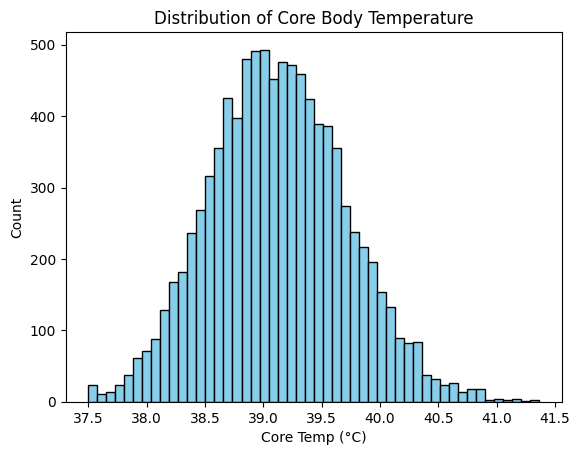

In [218]:
import numpy as np


def generate_cbt(df, rng=np.random.default_rng()):
    base = 38.5  # average resting CBT in °C
    
    # ----- Contextual Adjustments -----
    indoor_adjust = np.where(df["Indoor/Outdoor"] == "Outdoor_Now", 0.6, 0.0)
    season_adjust = np.select(
        [df["Season"] == "Winter", df["Season"] == "Summer"],
        [-0.2, 0.3],
        default=0.0
    )

    # ----- Environmental factors -----
    temp_adjust = 0.03 * (df["Ambient_Temp"] - 25)   # hotter environments raise CBT
    hum_adjust  = -0.01 * (df["Ambient_Humidity"] - 50)  # higher humidity slows cooling
    sun_adjust  = 0.0005 * df["Sun Exposure"]
    wind_adjust = 0.15 * df["Wind Cooling Effect"]   # negative if cooling effect is <0
    
    # ----- Coat effects -----
    coat_temp_offset = (
        map_val(df["Coat Length"], coat_len_temp)
        + map_val(df["Coat Type"], coat_type_temp)
    )
    coat_hum_offset = (
        map_val(df["Coat Length"], coat_len_hum)
        + map_val(df["Coat Type"], coat_type_hum)
    )
    
    # small random variation (~6%) 
    N = len(df)
    coat_temp_offset *= 1 + rng.normal(0, 0.06, N)
    coat_hum_offset  *= 1 + rng.normal(0, 0.06, N)

    # ----- Combine everything -----
    cbt_mean = (
        base
        + indoor_adjust
        + season_adjust
        + temp_adjust
        + hum_adjust
        + sun_adjust
        + wind_adjust
        + 0.15 * coat_temp_offset
        + 0.03 * coat_hum_offset
    )
    

        # --- Risk/vulnerability adjustments ---

    if {"Breed", "Age", "Weight"}.issubset(df.columns):
        age_mu_map = dict(zip(breed_params_df["Breed"], breed_params_df["age_mu"]))
        wt_mu_map  = dict(zip(breed_params_df["Breed"], breed_params_df["wt_mu"]))
        
        age_diff = (df["Age"].fillna(df["Age"].median()) - df["Breed"].map(age_mu_map)).fillna(0)
        wt_diff  = (df["Weight"] / df["Breed"].map(wt_mu_map) - 1).fillna(0)
        
        # --- OPTION 1: Risk score based additive offset ---
        raw_risk = 0.05 * age_diff + 0.15 * wt_diff
        risk_score = (raw_risk - raw_risk.min()) / (raw_risk.max() - raw_risk.min() + 1e-9)
        
        additive_offset = 0.6 * risk_score   # tune 0.2..0.6
        # cbt_mean += additive_offset # deterministic
        cbt_mean += rng.normal(loc=additive_offset, scale=0.3) # stochastic
        

    # Add physiological noise
    cbt = rng.normal(cbt_mean, 0.35)  # ~0.35°C random variation

    # Clip to physiological range
    return np.clip(cbt, 37.5, 42.0)

# Apply to your dataframe
df["CBT_simulated"] = generate_cbt(df)


plt.hist(df["CBT_simulated"], bins=50, color="skyblue", edgecolor="k")
plt.title("Distribution of Core Body Temperature")
plt.xlabel("Core Temp (°C)")
plt.ylabel("Count")
plt.show()

# can also add bracyphellic risk flag based on breed list once Manaswi finishes that mapping.

Above 39.4 is abnormal. Above 40 is indicative of heat exhaustion. 41 is heat stroke. 

In [219]:
#df = df.drop('CBT', axis=1)
#df = df.drop('Core_Temp', axis=1)

In [220]:
len(df[(df["CBT_simulated"] > 39.4) & (df["CBT_simulated"] < 40.0)]) # abnormal

2298

In [221]:
len(df[(df["CBT_simulated"] > 40.0) & (df["CBT_simulated"] < 41.0)]) # heat exhaustion, 0 actually experiencing heat stroke

651

In [222]:
# Adding other flags:
# isold flag (12+ years old)
df["is_old"] = (df["Age"] >= 12).astype(int)
df["is_overweight"] = (df["BCS"] >= 7).astype(int)
df["heat_stress_risk"] = ((df["is_old"] == 1) | (df["is_overweight"] == 1) | (df["is_brachycephalic"] == 1)).astype(int)
df["heat_stress_risk"].value_counts()

heat_stress_risk
0    4713
1    4622
Name: count, dtype: int64

In [223]:
df["is_overweight"].value_counts()
#df["is_brachycephalic"].value_counts()

# can sanity check against known percentages of overweight dogs

is_overweight
0    6538
1    2797
Name: count, dtype: int64

In [224]:
df["H_device"].value_counts(bins=10)

(51.64, 57.685]                 4236
(57.685, 63.73]                 2254
(45.595, 51.64]                 1001
(93.955, 100.0]                  449
(81.865, 87.91]                  309
(75.82, 81.865]                  284
(63.73, 69.775]                  282
(87.91, 93.955]                  274
(69.775, 75.82]                  238
(39.489000000000004, 45.595]       8
Name: count, dtype: int64

In [225]:
df["High_humidity_fordogs"] = (df["H_device"] > 60).astype(int)
df["High_humidity_fordogs"].value_counts()

High_humidity_fordogs
0    6551
1    2784
Name: count, dtype: int64

In [226]:
# Binning humidity
df["Ambient_Humidity"].value_counts(bins=10)

(45.16, 52.015]    5099
(52.015, 58.87]    2526
(72.58, 79.435]     347
(65.725, 72.58]     345
(58.87, 65.725]     316
(79.435, 86.29]     286
(86.29, 93.145]     159
(93.145, 100.0]     149
(38.305, 45.16]     106
(31.38, 38.305]       2
Name: count, dtype: int64

### Need prior heat related injury flag

In [227]:
df.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'is_brachycephalic',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs'],
      dtype='object')

In [228]:
import numpy as np

def estimate_prior_HRI(row):
    risk = 0.002  # base prior risk (0.2%)
    
    # --- Breed contribution ---
    if row['is_brachycephalic'] == 1:
        risk += 0.04
    elif row['is_brachycephalic'] == 0:
        risk -= 0.01
    
    # --- Age group ---
    age = row['Age']
    if age == '3-6':
        risk += 0.01
    elif age == '7-10':
        risk += 0.02
    elif age == '10+':
        risk += 0.03

    bcs = row['BCS']
    if bcs <= 3:
        risk -= 0.01
    elif bcs >= 6 and bcs <= 7:
        risk += 0.02
    elif bcs >= 8:
        risk += 0.05


    # --- Neuter status ---
    if row['Spayed/Neutered'] == 1:
        risk += 0.01
    
    # Cap between 0 and 0.12 (12%)
    risk = np.clip(risk, 0, 0.12)
    return risk

df['prior_heat_related_injury_est'] = df.apply(estimate_prior_HRI, axis=1)
df['prior_heat_related_injury_est'].describe()

count    9335.000000
mean        0.023153
std         0.027103
min         0.000000
25%         0.000000
50%         0.012000
75%         0.042000
max         0.102000
Name: prior_heat_related_injury_est, dtype: float64

In [229]:
# Let's simulate a flag using this estimate by performing Bernoulli Sampling
# Modeled risk, since we dont have actual heat related illness incidence per population
df['simulated_heat_injury_flag'] = np.random.binomial(1, df['prior_heat_related_injury_est'])
df['simulated_heat_injury_flag'].value_counts()

simulated_heat_injury_flag
0    9119
1     216
Name: count, dtype: int64

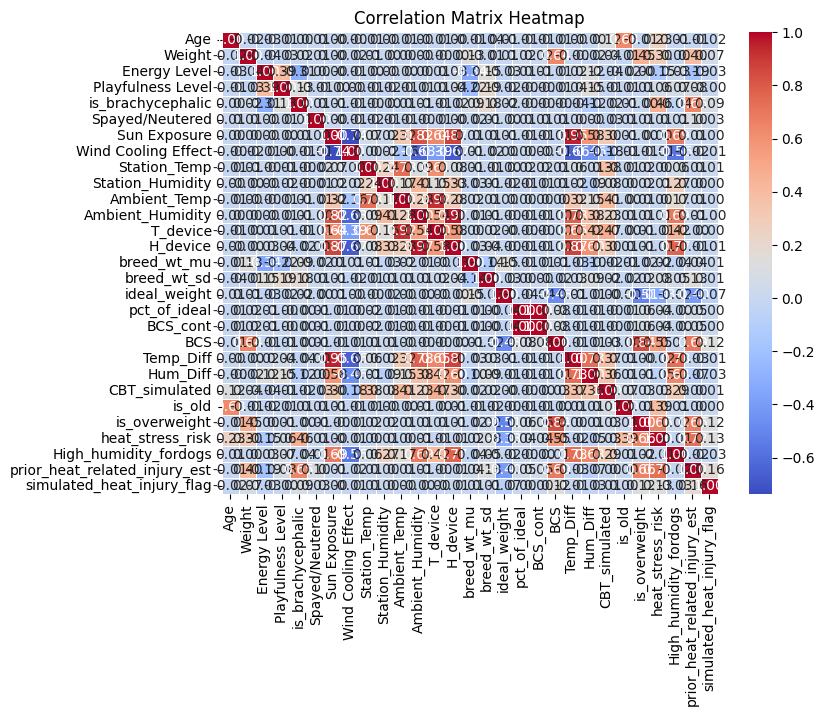

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Good sign that most features don't have strong multicolinearity with one another.

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X  = df.loc[:, df.columns != 'CBT_simulated']
y = df['CBT_simulated']
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Create a linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# will look much better once adjust for multicolinearity, feature selection, and make into a classification problem 

#TODO: Features to add in: 
# also have the bracyphellic, acclimatization, and a few other factors (potentially risk flag/score - use CBT and old age?) to add in. 
# can we get a good relationship between skin temp and core temp? 
# New feature: how dog is moving at time to acknowledge that we will also be getting accelerometer reads. 

#TODO: Features to REDUCE noise in (aka group/bin): 
# need to decide on thresholds that will make this into a classification model. - all clear, at risk, danger...
# bin the humdidity thresholds too (based on how it makes dog be able to cool down/panting effectiveness)
# "old age" flag  
# "dark" and "light" categories based on coat color to test hypothesis.

#TODO: Features to ADD noise in: 
# energy level, right now directly mapped from breed - use age and random noise (this is a habitual feature, not current speed)
# playfulness level, right now directly mapped from breed - use age and random noise (this is a habitual feature, not current speed)

Mean Squared Error: 0.2131
R-squared: 0.3828


In [232]:
X_train.head()

,Age,Weight,Energy Level,Playfulness Level,is_brachycephalic,Spayed/Neutered,Sun Exposure,Wind Cooling Effect,Station_Temp,Station_Humidity,...,Coat Type_Wavy,Coat Type_Wiry,size_category_Large,size_category_Medium,size_category_Small,size_category_Toy,Indoor/Outdoor_Outdoor_Now,Season_Spring,Season_Summer,Season_Winter
1409,4.7,29.1,5.0,5.0,0.0,1,0.0,0.0,23.495934,69.495611,...,False,False,True,False,False,False,False,True,False,False
10236,8.6,18.3,3.0,3.0,0.0,1,0.0,0.0,31.570356,63.893602,...,False,False,False,True,False,False,False,True,False,False
10336,14.4,19.5,3.0,3.0,0.0,1,0.0,0.0,35.346102,64.838669,...,False,False,False,True,False,False,False,False,True,False
6354,1.7,27.3,4.0,4.0,0.0,1,0.0,0.0,3.163942,68.000877,...,False,False,True,False,False,False,False,False,False,True
7413,16.3,17.6,4.0,3.0,0.0,1,0.0,0.0,30.792005,80.363545,...,False,False,False,True,False,False,False,False,False,False


Reframing as a classification problem instead of predicting exact CBT - suits our use case more

Defining Target Variables

In [233]:
df["target2Category"] = np.where(df["CBT_simulated"] >= 39.8, 1, 0) # tried 39.4, want to capture less

conditions = [
    df['CBT_simulated'] < 39.8,
    (df['CBT_simulated'] >= 39.8) & (df['CBT_simulated'] < 40.7),
    df['CBT_simulated'] >= 40.7
]
choices = ['Normal', 'Heat Stress', 'Heat Stroke']
df["target3Category"] = np.select(conditions, choices, default='Unknown')
df["target3Category"].value_counts()

target3Category
Normal         8151
Heat Stress    1126
Heat Stroke      58
Name: count, dtype: int64

Train-Test Split

In [234]:
# can try tweaking this more.

# Drop both target columns from X
X = df.drop(columns=['target2Category', 'target3Category'])

# Separate targets
y2 = df['target2Category']   # 2-class
y3 = df['target3Category']   # 3-class

from sklearn.model_selection import train_test_split

# Split X and y2 (or y3) keep class proportions
X_train, X_test, y2_train, y2_test = train_test_split(
    X, y2, test_size=0.2, random_state=42, stratify=y2
)

y3_train = y3.loc[X_train.index]
y3_test = y3.loc[X_test.index]

# both targets are aligned with same X split.

""""
X  = df.loc[:, ~df.columns.isin(['CBT_simulated', 'isHeatStress'])]
X = pd.get_dummies(X, drop_first=True)

y = df['isHeatStress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# write to csv  
"""



'"\nX  = df.loc[:, ~df.columns.isin([\'CBT_simulated\', \'isHeatStress\'])]\nX = pd.get_dummies(X, drop_first=True)\n\ny = df[\'isHeatStress\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n# write to csv  \n'

In [235]:
df.to_csv("FullSimDF.csv", index=False)

In [236]:
# BINARY - use 2 class target
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

y_train = y2_train
y_test = y2_test
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight = len(y[y==0]) / len(y[y==1])  # handles imbalance
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


ZeroDivisionError: division by zero

Using grid search to optimize

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    objective="binary:logistic",
    enable_categorical=True,
    eval_metric="logloss"
)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "scale_pos_weight": [len(y[y==0]) / len(y[y==1])]  # handles class imbalance
}


grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",      # best for imbalanced binary classification
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/ellawileman/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/Users/ellawileman/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/ellawileman/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._a

KeyboardInterrupt: 

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best CV Score (ROC-AUC):", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 5.430555555555555, 'subsample': 0.7}
Best CV Score (ROC-AUC): 0.7973519615304765

TEST ROC-AUC: 0.6735099337748344

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       151
           1       0.64      0.40      0.49        35

    accuracy                           0.84       186
   macro avg       0.75      0.67      0.70       186
weighted avg       0.83      0.84      0.83       186

Confusion Matrix:
 [[143   8]
 [ 21  14]]


Very Imbalanced Classes! Need to use SMOTE!!

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # <-- important (not sklearn Pipeline)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Define model
xgb = XGBClassifier(
    objective="binary:logistic",
    enable_categorical=True,
    eval_metric="logloss"
)

# Build pipeline (SMOTE happens before model training in each fold)
pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', xgb)
])

# Parameter grid (note the "model__" prefix now)
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [3, 5],
    "model__learning_rate": [0.01, 0.05],
    "model__scale_pos_weight": [1]  #  set to 1 because SMOTE balances the data now
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=True,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      gro...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200],
                         'model__scale_pos_weight': [1]},
             scoring='roc_auc', verbose=1)

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nTEST ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100, 'model__scale_pos_weight': 1}
Best CV ROC-AUC: 0.7986362293234331

TEST ROC-AUC: 0.6735099337748344

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       151
           1       0.64      0.40      0.49        35

    accuracy                           0.84       186
   macro avg       0.75      0.67      0.70       186
weighted avg       0.83      0.84      0.83       186

Confusion Matrix:
 [[143   8]
 [ 21  14]]


In [ ]:
import pandas as pd

# Get feature importances
xgb_best = best_model.named_steps['model']
importances = xgb_best.feature_importances_

# Combine with feature names
feat_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Display top features
print(feat_importances.head(15))

Season_Summer                0.267932
Coat Type_Double             0.044472
T_device                     0.040707
Season_Spring                0.030147
Breed_Border Collie          0.026257
Coat Type_Smooth             0.025832
Temp_Diff                    0.023945
Breed_Australian Shepherd    0.019853
is_brachycephalic            0.019840
Gender_Male                  0.019742
Playfulness Level            0.019634
Coat Length_Short            0.017928
Breed_Doberman Pinscher      0.017201
is_old                       0.016998
Color_Sable                  0.016752
dtype: float32


### TODO: Try other binary classifiers

Can also make categorical instead of binary:
- No risk
- Some risk, heat exhaustion/stress (at least 39.4, maybe could raise a bit to capture less)
- High risk, heat stroke (at least 41, maybe could do 40.8)

Can also use SMOTE on 3 class.

### TODO: Use model-agnostic feature selection

In [ ]:
df["Indoor/Outdoor"].value_counts()

Indoor/Outdoor
Indoor_Now     742
Outdoor_Now    184
Name: count, dtype: int64

#### New Features
- ***Station Temp***: raw temp baseline reported by weather station
- ***Station Humidity***: raw humidity baseline reported by weather station
- ***Ambient Temp***: temp experienced in air near dog 
- ***Ambient Humidity***: humidity experienced in air near dog
- ***Temp_Diff***: effect of coat, activity level, environ on temp readings
- ***Hum_Diff***: effect of coat, activity level, environ on humidity readings
- ***T_device***: temp recorded by device
- ***H_device***: humidity recorded by device
- ***CBT***: true core body temp of dog
